In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
(train_images,train_labels),(test_images,test_labels)=datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
train_images.shape

(50000, 32, 32, 3)

In [ ]:
train_images , test_images=train_images/255.0 ,test_images/255.0

In [ ]:
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

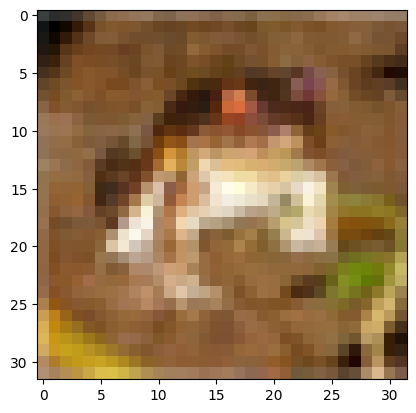

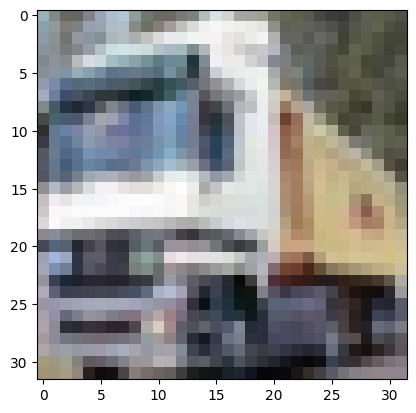

In [ ]:
for i in range(2):
  plt.imshow(train_images[i])
  plt.show()

In [ ]:
type(train_images)

numpy.ndarray

In [ ]:
from keras.layers import Dropout
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(Dropout(0.2))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(32,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

In [ ]:

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 dropout (Dropout)           (None, 30, 30, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
Total params: 10,144
Trainable params: 10,144
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(10,activation='softmax'))


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 dropout (Dropout)           (None, 30, 30, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               3211776   
                                                      

In [ ]:
from keras.optimizers import SGD
sgd=SGD(lr=0.01,momentum=0.9,decay=(0.01/25))
model.compile(optimizer='sgd',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
his=model.fit(train_images,train_labels,epochs=10,validation_data=(test_images,test_labels),batch_size=32)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 [==============================] - 236s 150ms/step - loss: 2.0151 - accuracy: 0.2658 - val_loss: 1.7543 - val_accuracy: 0.3823
Epoch 2/10
1563/1563 [==============================] - 229s 146ms/step - loss: 1.6872 - accuracy: 0.3964 - val_loss: 1.6169 - val_accuracy: 0.4255
Epoch 3/10
1563/1563 [==============================] - 236s 151ms/step - loss: 1.5379 - accuracy: 0.4487 - val_loss: 1.4530 - val_accuracy: 0.4856
Epoch 4/10
1563/1563 [==============================] - 235s 151ms/step - loss: 1.4306 - accuracy: 0.4870 - val_loss: 1.3706 - val_accuracy: 0.5183
Epoch 5/10
1563/1563 [==============================] - 230s 147ms/step - loss: 1.3435 - accuracy: 0.5180 - val_loss: 1.2874 - val_accuracy: 0.5430
Epoch 6/10
1563/1563 [==============================] - 236s 151ms/step - loss: 1.2618 - accuracy: 0.5501 - val_loss: 1.2197 - val_accuracy: 0.5715
Epoch 7/10
1563/1563 [==============================] - 233s 149ms/step - loss: 1.1841 - accuracy: 0.5776 - val_loss: 1.181

In [ ]:
test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=2)
print("Test Acc:{}".format(test_acc)) 

313/313 - 8s - loss: 1.0514 - accuracy: 0.6313 - 8s/epoch - 26ms/step
Test Acc:0.6312999725341797


In [ ]:
mm.save("CIFAR_10_epochs_10.h5")

In [ ]:
test_loss,test_acc=mm.evaluate(test_images,test_labels,verbose=2)
print("Test Acc:{}".format(test_acc)) 

313/313 - 4s - loss: 0.9922 - accuracy: 0.7110 - 4s/epoch - 14ms/step
Test Acc:0.7110000252723694


In [ ]:
from PIL import Image
import numpy as np
im=Image.open("/content/girl-1894125_960_720.jpg")

im=im.resize((32,32))
im=np.expand_dims(im,axis=0)
im=np.array(im)
pred=mm.predict([im])[0]


1/1 [==============================] - 0s 32ms/step


In [ ]:
pred

array([ -423.52768,  -737.89166,  -142.14401,   203.57983,  -270.11472,
         466.83664, -1154.202  ,   530.56226,  -177.53532,   450.98706],
      dtype=float32)

In [ ]:
np.amax(pred)

530.56226

In [ ]:
result=np.argmax(pred)

In [ ]:
print("Predicted Label:",result,"Name:",class_names[result])

Predicted Label: 7 Name: horse


In [ ]:
test_loss,test_acc=mm.evaluate(test_images,test_labels,verbose=2)
print("Test Acc:{}".format(test_acc)) 

313/313 - 4s - loss: 0.9922 - accuracy: 0.7110 - 4s/epoch - 14ms/step
Test Acc:0.7110000252723694


In [ ]:
mm.save("model1_cifar_10epoch.h5")